
# ¿Por qué la regresión logística se considera un modelo lineal?

La respuesta corta es: La regresión logística se considera un modelo lineal generalizado porque el resultado siempre depende de la suma de las entradas y los parámetros. O, en otras palabras, ¡el resultado no puede depender del producto (o cociente, etc.) de sus parámetros!

Hagamos una pequeña demostración de esto:


El borde de decisión es el conjunto de x tal que 
$$
 \frac{1}{1+e^{-(\beta_{0}+\beta_{1}·x_{1}+\beta_{2}·x_{2}+\dots+\beta_{p}·x_{p})}}=0.5,
$$
un poco de álgebra muestra que esto es equivalente a 
$$
1=e^{-(\beta_{0}+\beta_{1}·x_{1}+\beta_{2}·x_{2}+\dots+\beta_{p}·x_{p})}
$$
y, tomando el logaritmo natural de ambos lados,
$$
0=-(\beta_{0}+\beta_{1}·x_{1}+\beta_{2}·x_{2}+\dots+\beta_{p}·x_{p})=-\beta_{0}-\sum_{i=1}^{p}\beta_{i}·x_{i}
$$
por lo que el borde de decisión es lineal.

# Comparacion de clasificadores

Una comparación de varios clasificadores en scikit-learn en conjuntos de datos sintéticos. El objetivo de este ejemplo es ilustrar la naturaleza de los límites de decisión de los diferentes clasificadores. Hay que tomarlo con pinzas, ya que la intuición que transmiten estos ejemplos no se traslada necesariamente a los conjuntos de datos reales.

Especialmente en los espacios de alta dimensión, los datos pueden separarse más fácilmente de forma lineal.

Los gráficos muestran los puntos de entrenamiento en colores sólidos y los puntos de prueba semitransparentes. La parte inferior derecha muestra la precisión de la clasificación en el conjunto de pruebas.
- [Comparación de clasificadores con Scikit-Learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [3]:
h = 0.02  # tamaño de paso en la malla

In [17]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "LogisticRegression",
]

In [32]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LogisticRegression(),
]

In [40]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [30]:
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

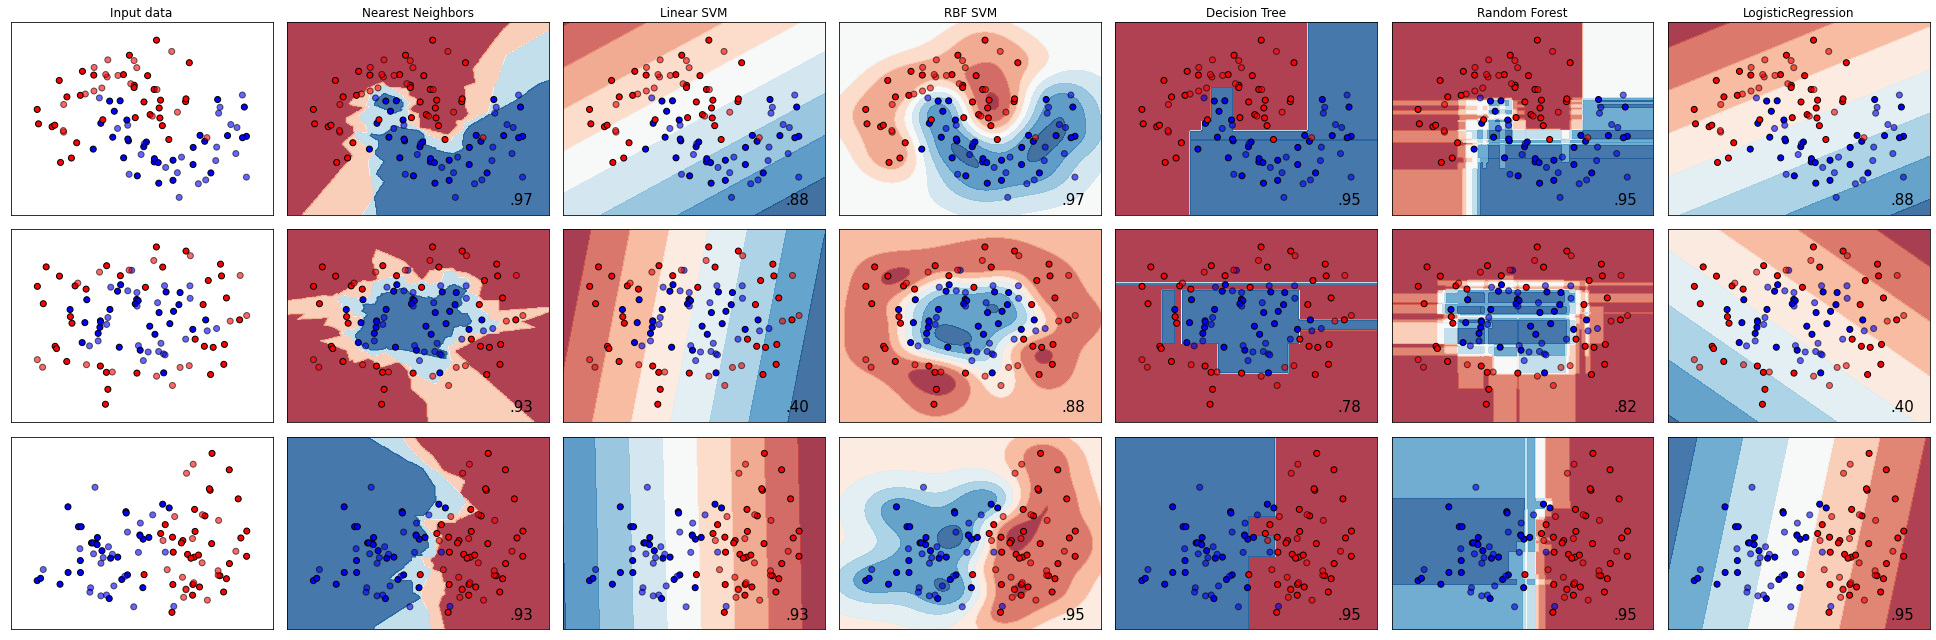

In [31]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterar sobre conjuntos de datos
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

Los labels de las columnas de arriba son: 
input data-Nearest Neighbors-Linear SVM-RBF SVM-Decision Tree-Random Forest-LogisticRegression

# Diferencia entre regresión lineal y regresión lineal multiple

En el siguiente ejemplo, utilizaremos la regresión lineal múltiple para predecir el precio del índice bursátil (es decir, la variable dependiente) utilizando 2 variables independientes/de entrada:

* Tipo de interés
* Tasa de desempleo

Tenga en cuenta que tendrá que validar que se cumplen varios supuestos antes de aplicar los modelos de regresión lineal. En particular, debe asegurarse de que existe una relación lineal entre la variable dependiente y la(s) variable(s) independiente(s).

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

In [3]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


## Chequeando la linealidad

Antes de ejecutar un modelo de regresión lineal, es aconsejable validar que se cumplen ciertos supuestos.
Lo idea es comprobar que existe una relación lineal entre la variable dependiente y la/s variable/s independiente/s.

Para realizar una comprobación rápida de la linealidad, puede realizando un pairplot.

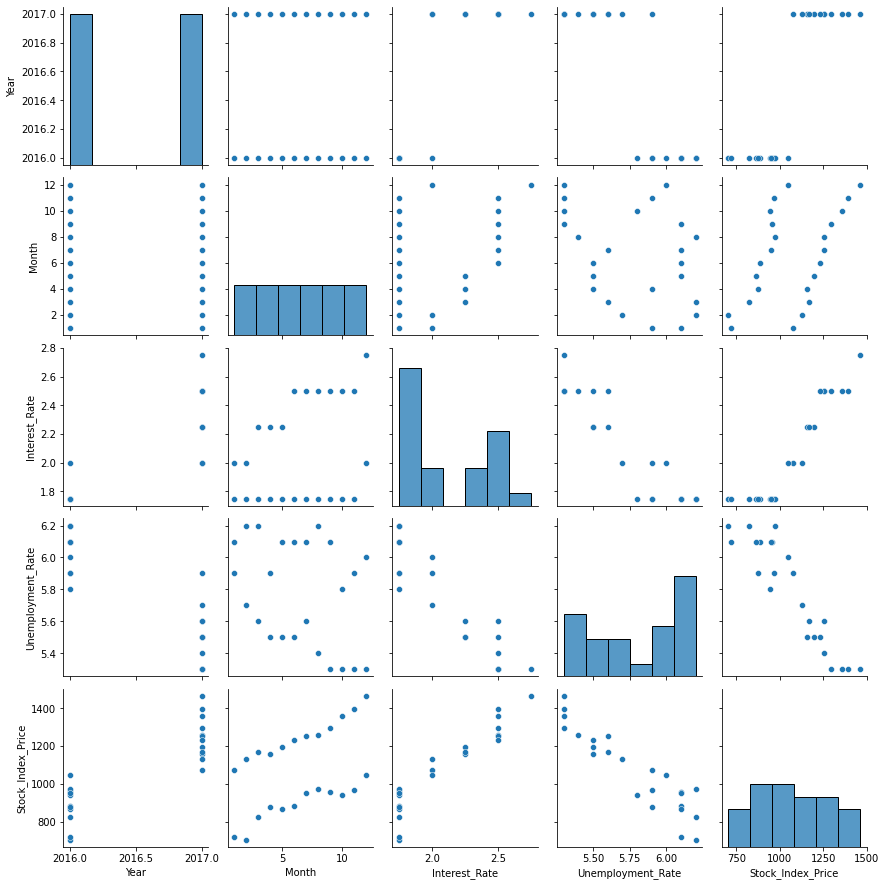

In [4]:
sns.pairplot(df)

Observando el plot anterior, es posible que desee comprobar que existe una relación lineal entre
* Precio_del_índice_de_las_acciones (variable dependiente) y Tipo_de_interés (variable independiente)
* Precio_del_índice_de_las_acciones (variable dependiente) y Tasa_de_desempleo (variable independiente)

In [5]:
X = df[['Interest_Rate']] # Utilicemos solo la tasa de interes, para la regresión.
Y = df['Stock_Index_Price']
 
# con sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# predicción con sklearn
New_Interest_Rate = 2.3

print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ]]))
print ('Score: \n', regr.score(X, Y))

Intercept: 
 -99.46431881371655
Coefficients: 
 [564.20389249]
Predicted Stock Index Price: 
 [1198.20463392]
Score: 
 0.8757089547891359


Llegamos a una formula de la forma Stock_Index_Price= Intercept + Interest_Rate coef * X1

In [6]:
X = df[['Interest_Rate','Unemployment_Rate']] # Utilicemos la tasa de interes y la tasa de desempleo, para la regresion esto seria una regresión lineal multiple.
Y = df['Stock_Index_Price']
 
# con sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# predicción con sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3

print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))
print ('Score: \n', regr.score(X, Y))

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
Score: 
 0.8976335894170216


Stock_Index_Price = Intercept + Interest_Rate coef * X1 + Unemployment_Rate coef*X2 

Stock_Index_Price = 1798.4040 + 345.5401 * X1 -250.1466 * X2

In [7]:
# Podemos hacer lo mismo con statsmodels
X = sm.add_constant(X) # Añadimos una constante a la regresión
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           4.04e-11
Time:                        11:35:51   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

# Generación de características polinómicas

A menudo es útil añadir complejidad a un modelo considerando características no lineales de los datos de entrada. Mostramos dos posibilidades, ambas basadas en polinomios: La primera utiliza polinomios puros, la segunda utiliza splines, es decir, polinomios a trozos.

## Características polinómicas

Un método sencillo y común es el de las características polinómicas, que puede obtener los términos de alto orden e interacción de las características. Se implementa con PolynomialFeatures:

In [10]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [11]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Las características de X se han transformado de (X1,X2) a (1,X1,X2,X1^2,X1 X2,X2^2)

En algunos casos, sólo se requieren términos de interacción entre las características, y se puede obtener con el ajuste interaction_only=True:

In [26]:
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

(X1,X2) a (1,X1,X2,X1 X2)

## Underfitting vs. Overfitting

Este ejemplo demuestra los problemas de underfitting y overfitting y cómo podemos utilizar la regresión lineal con características polinómicas para aproximar funciones no lineales. El gráfico muestra la función que queremos aproximar, que es una parte de la función coseno. Además, se muestran las muestras de la función real y las aproximaciones de diferentes modelos. Los modelos tienen características polinómicas de diferentes grados. Podemos ver que una función lineal (polinomio de grado 1) no es suficiente para ajustarse a las muestras de entrenamiento. Esto se denomina underfitting. Un polinomio de grado 4 se aproxima casi perfectamente a la función verdadera. Sin embargo, para grados superiores el modelo se sobreajusta a los datos de entrenamiento, es decir, aprende el ruido de los datos de entrenamiento. 

Este ejemplo fue tomado y adaptado del siguiente link :
- [Underfitting vs. Overfitting]( https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

Degree 1
MSE = 4.08e-01(+/- 4.25e-01)
Degree 4
MSE = 4.32e-02(+/- 7.08e-02)
Degree 15
MSE = 1.83e+08(+/- 5.48e+08)


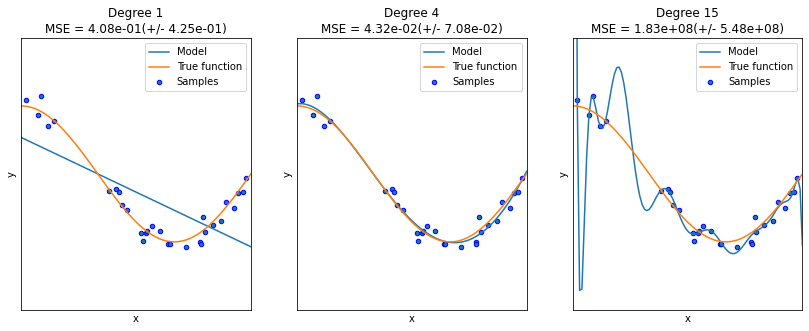

In [31]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
    print("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        ))
plt.show()


Evaluamos cuantitativamente el overfitting/underfitting utilizando la validación cruzada. Calculamos el error cuadrático medio (MSE) en el conjunto de validación; cuanto más alto, menos probable es que el modelo generalice correctamente a partir de los datos de entrenamiento.

##  Se puede utilizar la regresión logística para clasificar más de 2 clases ? 

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

c:\Users\ThoT\anaconda3\envs\datascience1\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


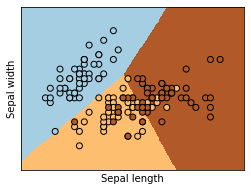

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
np.unique(Z)

array([0, 1, 2])

## Como clasificar multiclase

No todos los modelos predictivos de clasificación admiten la clasificación multiclase.

Algoritmos como el Perceptrón, la Regresión Logística y las Máquinas de Vectores de Apoyo fueron diseñados para la clasificación binaria y no admiten de forma nativa tareas de clasificación con más de dos clases.

Un enfoque para utilizar algoritmos de clasificación binaria para problemas de clasificación múltiple es dividir el conjunto de datos de clasificación multiclase en múltiples conjuntos de datos de clasificación binaria y ajustar un modelo de clasificación binaria en cada uno de ellos. Dos ejemplos diferentes de este enfoque son las estrategias Uno-vs-Resto y Uno-vs-Uno. Solo veremos el primero de estos que es el que se utiliza en Sklearn cuando utilizamos la regresión logística para el caso de multiclase.

## Clasificadores binarios para la clasificación multiclase

La clasificación es un problema de modelización predictiva que implica la asignación de una etiqueta de clase a un ejemplo.

La clasificación binaria son aquellas tareas en las que los ejemplos se asignan exactamente a una de dos clases. La clasificación multiclase son aquellas tareas en las que a los ejemplos se les asigna exactamente una de más de dos clases.

    Clasificación binaria: Tareas de clasificación con dos clases.
    Clasificación multiclase: Tareas de clasificación con más de dos clases.

Algunos algoritmos están diseñados para problemas de clasificación binaria. Algunos ejemplos son:

    Regresión logística
    Perceptrón
    Máquinas de vectores de apoyo

Como tales, no pueden utilizarse para tareas de clasificación multiclase, al menos no directamente.

En su lugar, se pueden utilizar métodos heurísticos para dividir un problema de clasificación multiclase en múltiples conjuntos de datos de clasificación binaria y entrenar un modelo de clasificación binaria en cada uno de ellos.

Dos ejemplos de estos métodos heurísticos son

* Uno contra resto (OvR)
* Uno contra uno (OvO)


### One-Vs-Rest para la clasificación multiclase

El método "uno contra el resto", es un método heurístico para utilizar algoritmos de clasificación binaria para la clasificación multiclase.

Consiste en dividir el conjunto de datos multiclase en múltiples problemas de clasificación binaria. A continuación, se entrena un clasificador binario en cada problema de clasificación binaria y las predicciones se realizan utilizando el modelo de mayor confianza.

Por ejemplo, dado un problema de clasificación multiclase con ejemplos para cada clase "rojo", "azul" y "verde". Esto podría dividirse en tres conjuntos de datos de clasificación binaria como sigue:

    Problema de clasificación binaria 1: rojo frente a [azul, verde]
    Problema de clasificación binaria 2: azul frente a [rojo, verde].
    Problema de clasificación binaria 3: verde frente a [rojo, azul].

Un posible inconveniente de este enfoque es que requiere la creación de un modelo para cada clase. Por ejemplo, tres clases requieren tres modelos. Esto podría ser un problema para conjuntos de datos grandes (por ejemplo, millones de filas), modelos lentos (por ejemplo, redes neuronales) o un número muy grande de clases (por ejemplo, cientos de clases).

Este enfoque requiere que cada modelo prediga una probabilidad de pertenencia a una clase o una puntuación de tipo probabilístico. El argmax de estas puntuaciones (índice de clase con la mayor puntuación) se utiliza entonces para predecir una clase.

Este enfoque se utiliza habitualmente para los algoritmos que predicen de forma natural la probabilidad de pertenencia a la clase o la puntuación numérica, como:

    Regresión logística
    Perceptrón

Como tal, la implementación de estos algoritmos en la biblioteca scikit-learn implementa la estrategia OvR por defecto cuando se utilizan estos algoritmos para la clasificación multiclase.

Podemos demostrarlo con un ejemplo sobre un problema de clasificación de 3 clases utilizando el algoritmo LogisticRegression. La estrategia para manejar la clasificación multiclase puede establecerse a través del argumento "multi_class" y puede establecerse como "ovr" para la estrategia uno-vs-resto.

El ejemplo completo de ajuste de un modelo de regresión logística para la clasificación multiclase utilizando la estrategia incorporada de uno-vs-resto se indica a continuación.

In [35]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [37]:
yhat[:10]	

array([1, 0, 1, 2, 0, 2, 1, 2, 0, 1])

In [38]:
model = LogisticRegression()
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

In [39]:
yhat[:10]	

array([1, 0, 1, 2, 0, 2, 1, 2, 0, 1])